# Analysis for plot of AV-V Flash Lag Effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy.io import loadmat


In [2]:
# # Load data loadmat
# data = loadmat('data/874707_av_v_fle_2024-10-09_12h54.02.373.mat')
   
# # Zip the arrays to the shortest length
# zipped_data = list(zip(data["responses"], data["responseTimes"], data["incidentTimesAimed"], data["audioDelaysAimed"], data["visualDelaysAimed"], data["trialDurations"], data["audioTime"], data["flashTime"], data["trialNum"]))
# # Unzip the data back into individual lists
# all_responses, responseTimes, incidentTimes, audioDelays, visualDelays, trial_durs, audioTime, flashTime, trialNum = map(list, zip(*zipped_data))
# df = pd.DataFrame({
#     'responses': flatten_extend(all_responses),
#     'responseTimes': flatten_extend(responseTimes),
#     'incidentTimesAimed': flatten_extend(incidentTimes),
#     'audioDelaysAimed': flatten_extend(audioDelays),
#     'visualDelaysAimed': flatten_extend(visualDelays),
#     'trialDurations': flatten_extend(trial_durs),
#     'audioTime': flatten_extend(audioTime),
#     'flashTime': flatten_extend(flashTime),
#     'trialNum': flatten_extend(trialNum)
# })

In [3]:
# Setup plot defaults
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sio

# Matplotlib settings
#
#reset styling to default
plt.rcdefaults()
# styling settings
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_palette("husl")
# grid on
plt.rcParams['axes.grid'] = True

# top and right axis spines off
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
# title 18 x y labels 16 ticks 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['figure.figsize'] = (10, 6)

# make axis equal
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['figure.autolayout'] = True
# grid color
plt.rcParams['grid.color'] = '0.9'


In [4]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

#all_responses=flatten_extend(all_responses)


In [24]:
df =  pd.read_csv('data/405836_av_v_fle_2024-10-14_16h33.24.360.csv')
# Create a new column that will represent the audioDelayAimed in terms of ms
df['audioDelaysAimed_ms']=round(df['audioDelaysAimed']*16.6667,3)
df['visualDelaysAimed_ms'] = round(df['visualDelaysAimed']*16.6667,3)
df['audioDelayReal_ms'] =(df["audioTime"]-df["flashTime"])*1000
df




,Unnamed: 0,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,trialDurations,audioTime,flashTime,trialNum,flashPostionX,bar_at_flash_X,directions,audioDelaysAimed_ms,visualDelaysAimed_ms,audioDelayReal_ms
0,0,0,0.432225,0.819932,-2,-1,1.314014,0.781183,0.813639,1,105.732678,96.601727,1,-33.333,-16.667,-32.4559
1,1,0,0.035571,0.617446,-2,-1,1.314014,0.566077,0.599764,2,12.969684,22.100635,-1,-33.333,-16.667,-33.6877
2,2,0,0.099354,0.759993,-2,-2,1.314014,0.714396,0.747711,3,78.339825,60.077923,1,-33.333,-33.333,-33.3150
3,3,1,0.133810,0.802736,4,2,1.314014,0.864917,0.798283,4,-69.208874,-87.470776,-1,66.667,33.333,66.6343
4,4,1,0.050594,0.618635,6,2,1.314014,0.715489,0.614941,5,-31.231586,-12.969684,1,100.000,33.333,100.5482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,1,1.800538,0.560955,-4,2,1.314014,0.482929,0.550143,388,67.755390,49.493488,-1,-66.667,33.333,-67.2141
388,388,1,0.283460,0.470659,-2,2,1.314014,0.427323,0.461356,389,-113.410145,-95.148243,1,-33.333,33.333,-34.0327
389,389,0,0.133495,0.670326,-6,0,1.314014,0.564419,0.665328,390,-14.423168,-14.423168,-1,-100.000,0.000,-100.9092
390,390,0,0.034304,0.732522,-6,-4,1.314014,0.612492,0.712959,391,78.339825,41.816021,1,-100.000,-66.667,-100.4673


[-100.     -66.667  -33.333    0.      33.333   66.667  100.   ]


' \nThis figure shows the mean proportion of lag responses as a function of the visual delay of the flash relative to the bar.\nEach line represents a different audio delay. The x-axis represents the visual delay of the flash relative to the bar in milliseconds, \nand the y-axis represents the proportion of lag responses. The horizontal dashed line represents the chance level of 0.5, \nand the vertical dashed line represents the point of simultaneity. The data show that the proportion of lag responses increases as the visual delay \nof the flash relative to the bar increases. The data also show that the proportion of lag responses increases as the audio delay increases. \nThis suggests that the audio delay influences the perception of temporal processing between the flash and the bar.\n\n\n'

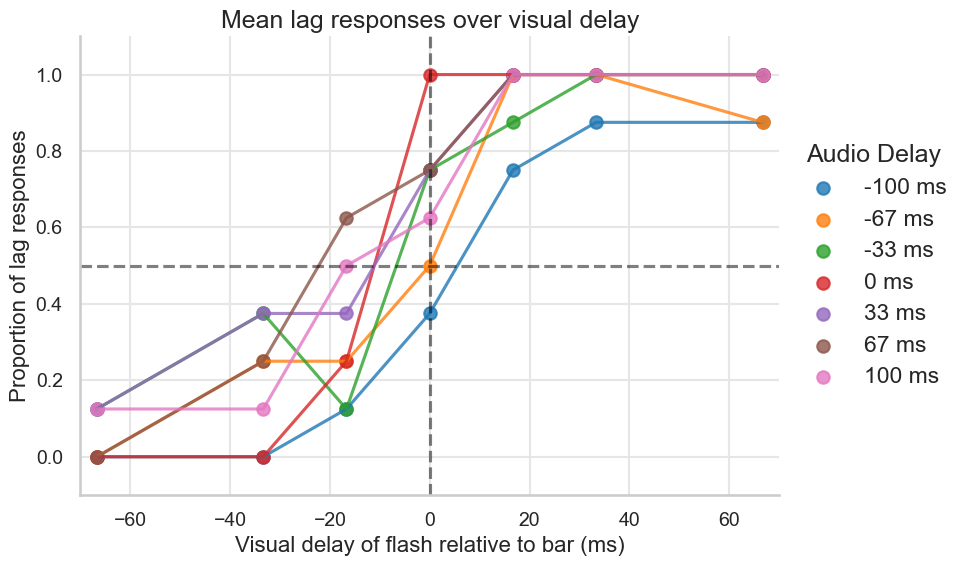

In [29]:
unique_audioDelays = np.unique(df['audioDelaysAimed_ms'])

print(unique_audioDelays)
colors=plt.get_cmap('tab10').colors

for i, delays in enumerate(unique_audioDelays):
    meanX = df[df['audioDelaysAimed_ms'] == delays].groupby('visualDelaysAimed_ms').mean().reset_index()
    meanResponses = meanX['responses']
    plt.scatter(meanX['visualDelaysAimed_ms'], meanResponses, color=colors[i], label=f'{round(delays)} ms', alpha=0.8)
    plt.plot(meanX['visualDelaysAimed_ms'], meanResponses, color=colors[i], alpha=0.8)

plt.ylim(-0.1, 1.10)  # Extend the y-axis limit slightly beyond 0 and 1
# extend the x-axis limit slightly beyond 0
plt.xlim(-70, 70)
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title('Mean lag responses over visual delay')
plt.legend(title='Audio Delay', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Visual delay of flash relative to bar (ms)')
plt.ylabel('Proportion of lag responses')
plt.title

""" 
This figure shows the mean proportion of lag responses as a function of the visual delay of the flash relative to the bar.
Each line represents a different audio delay. The x-axis represents the visual delay of the flash relative to the bar in milliseconds, 
and the y-axis represents the proportion of lag responses. The horizontal dashed line represents the chance level of 0.5, 
and the vertical dashed line represents the point of simultaneity. The data show that the proportion of lag responses increases as the visual delay 
of the flash relative to the bar increases. The data also show that the proportion of lag responses increases as the audio delay increases. 
This suggests that the audio delay influences the perception of temporal processing between the flash and the bar.


"""

[-100.     -66.667  -33.333    0.      33.333   66.667  100.   ]


/var/folders/_p/yywkspd92qs_6p63bz38bswr0000gn/T/ipykernel_23166/3517775267.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='visualDelayAimed_ms_jittered', y='responses_jittered', hue='audioDelaysAimed_ms', data=grouped_data, ci=None, legend=False, palette='tab10')


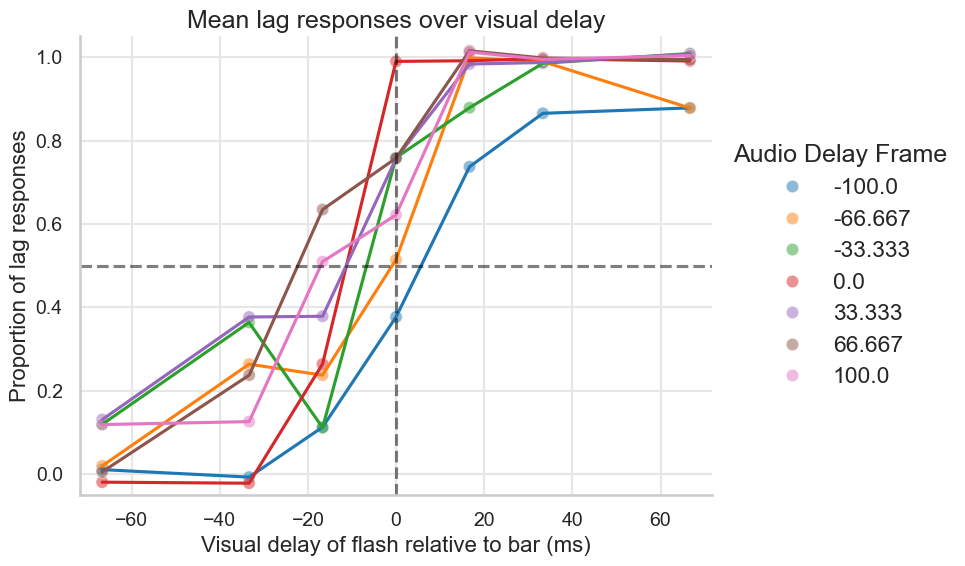

In [ ]:
# now plot the mean responses for each visual delay aimed and audio delay aimed
# Group the data by visualDelayAimed and audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby(['visualDelaysAimed_ms', 'audioDelaysAimed']).mean().reset_index()
grouped_data

# Assuming 'responses' is already in the grouped_data DataFrame
# Create a jitter effect
jitter_strength = .01 # Adjust as needed
grouped_data['visualDelayAimed_ms_jittered'] = grouped_data['visualDelaysAimed_ms'] + np.random.normal(0, jitter_strength, size=len(grouped_data))
grouped_data['responses_jittered'] = grouped_data['responses'] + np.random.normal(0, jitter_strength, size=len(grouped_data))

unique_audioDelays = grouped_data['audioDelaysAimed_ms'].unique()
print(unique_audioDelays)


# Plot the data with jitter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms_jittered', y='responses_jittered', hue='audioDelaysAimed_ms', data=grouped_data, palette='tab10', alpha=0.5)
# connect the points with lines
sns.lineplot(x='visualDelaysAimed_ms_jittered', y='responses_jittered', hue='audioDelaysAimed_ms', data=grouped_data, ci=None, legend=False, palette='tab10')
plt.xlabel('Visual delay of flash relative to bar (ms)')
plt.ylabel('Proportion of lag responses')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1
plt.xlim(grouped_data['visualDelaysAimed_ms'].min() - 5, grouped_data['visualDelaysAimed_ms'].max() + 5)  # Extend the x-axis limit slightly beyond min and max values
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title('Mean lag responses over visual delay')
plt.legend(title='Audio Delay Frame', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

## Psychometric function fitting


In [34]:
import numpy as np
from scipy.optimize import curve_fit

/opt/miniconda3/envs/mathmod/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


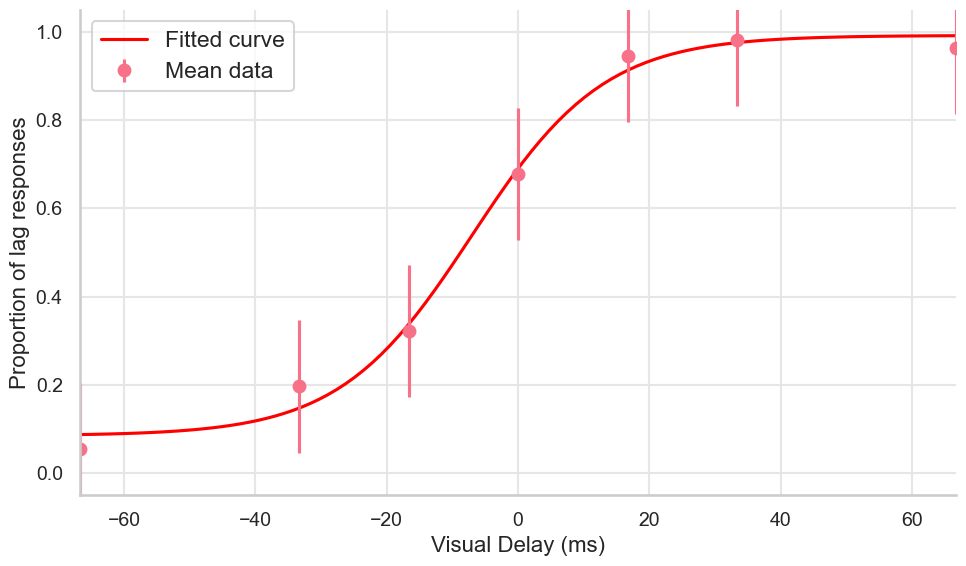

In [40]:

# Define the logistic function
def logistic_function(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

# Prepare the data for fitting
x_data = df['visualDelaysAimed_ms']
y_data = df['responses']

# Initial guess for the parameters
initial_guess = [max(y_data), np.median(x_data), 1, min(y_data)]

# Fit the logistic function to the data
params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)
# Generate data for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = logistic_function(x_fit, *params)

# Plot the data and the fitted curve
plt.plot(x_fit, y_fit, color='red', label='Fitted curve')

# plot the mean data
mean_data = df.groupby('visualDelaysAimed_ms').mean().reset_index()
plt.errorbar(mean_data['visualDelaysAimed_ms'], mean_data['responses'], yerr=mean_data['responses'].sem(), fmt='o', label='Mean data')
plt.ylabel('Proportion of lag responses')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1

plt.xlabel('Visual Delay (ms)')
plt.legend()
plt.show()

In [ ]:
df["audioDelayAimed_ms"]=round(df["audioDelayAimed_ms"],2)

In [ ]:
df

,Unnamed: 0,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,trialDurations,audioTime,flashTime,trialNum,flashPostionX,bar_at_flash_X,directions,audioDelayAimed_ms,visualDelayAimed_ms,audioDelayReal_ms
0,0,0,0.432225,0.819932,-2,-1,1.314014,0.781183,0.813639,1,105.732678,96.601727,1,-33.33,-16.6667,-32.4559
1,1,0,0.035571,0.617446,-2,-1,1.314014,0.566077,0.599764,2,12.969684,22.100635,-1,-33.33,-16.6667,-33.6877
2,2,0,0.099354,0.759993,-2,-2,1.314014,0.714396,0.747711,3,78.339825,60.077923,1,-33.33,-33.3334,-33.3150
3,3,1,0.133810,0.802736,4,2,1.314014,0.864917,0.798283,4,-69.208874,-87.470776,-1,66.67,33.3334,66.6343
4,4,1,0.050594,0.618635,6,2,1.314014,0.715489,0.614941,5,-31.231586,-12.969684,1,100.00,33.3334,100.5482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,1,1.800538,0.560955,-4,2,1.314014,0.482929,0.550143,388,67.755390,49.493488,-1,-66.67,33.3334,-67.2141
388,388,1,0.283460,0.470659,-2,2,1.314014,0.427323,0.461356,389,-113.410145,-95.148243,1,-33.33,33.3334,-34.0327
389,389,0,0.133495,0.670326,-6,0,1.314014,0.564419,0.665328,390,-14.423168,-14.423168,-1,-100.00,0.0000,-100.9092
390,390,0,0.034304,0.732522,-6,-4,1.314014,0.612492,0.712959,391,78.339825,41.816021,1,-100.00,-66.6668,-100.4673


/opt/miniconda3/envs/mathmod/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


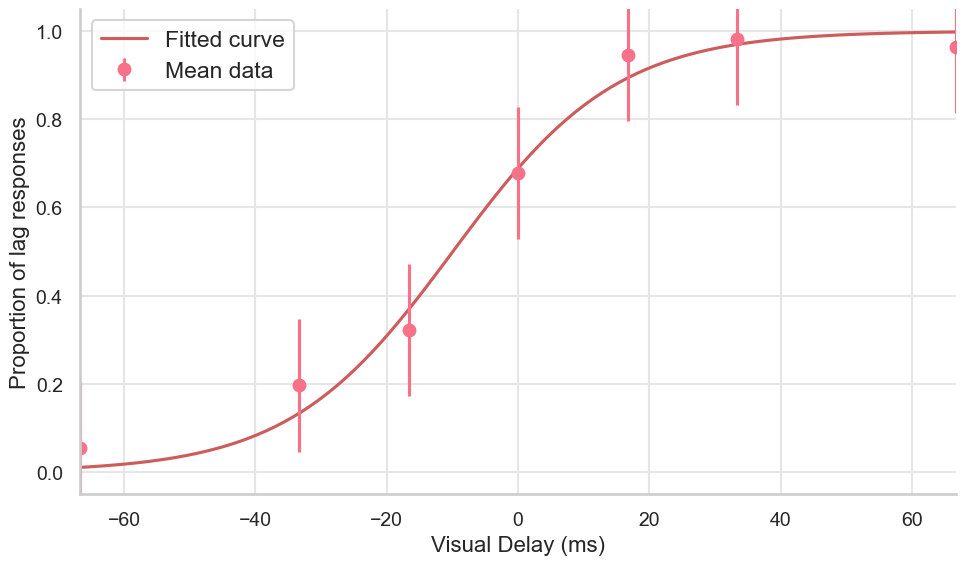

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# fit for overall data
def logistic_function(x, response, slope, bias):
    return 1 / (1 + np.exp(-(slope * (x - response) + bias)))

# Prepare the data for fitting
x_data = df['visualDelaysAimed_ms']
y_data = df['responses']

# Initial guess for the parameters
initial_guess = [np.median(x_data), 1, 0]  # Added initial guess for bias

# Fit the logistic function to the data
params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)

# Generate data for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = logistic_function(x_fit, *params)
plt.plot(x_fit, y_fit, color='indianred', label='Fitted curve')

# plot the means
mean_data = df.groupby('visualDelaysAimed_ms').mean().reset_index()
plt.errorbar(mean_data['visualDelaysAimed_ms'], mean_data['responses'], yerr=mean_data['responses'].sem(), fmt='o', label='Mean data')
plt.ylabel('Proportion of lag responses')
plt.xlabel('Visual Delay (ms)')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1
plt.legend()

# Plot the data and the fitted curve for unique audio delays
plt.figure(figsize=(10, 6))

unique_audioDelays = np.unique(df['audioDelaysAimed_ms'])





Slope parameter: 0.07901025286897832


/opt/miniconda3/envs/mathmod/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


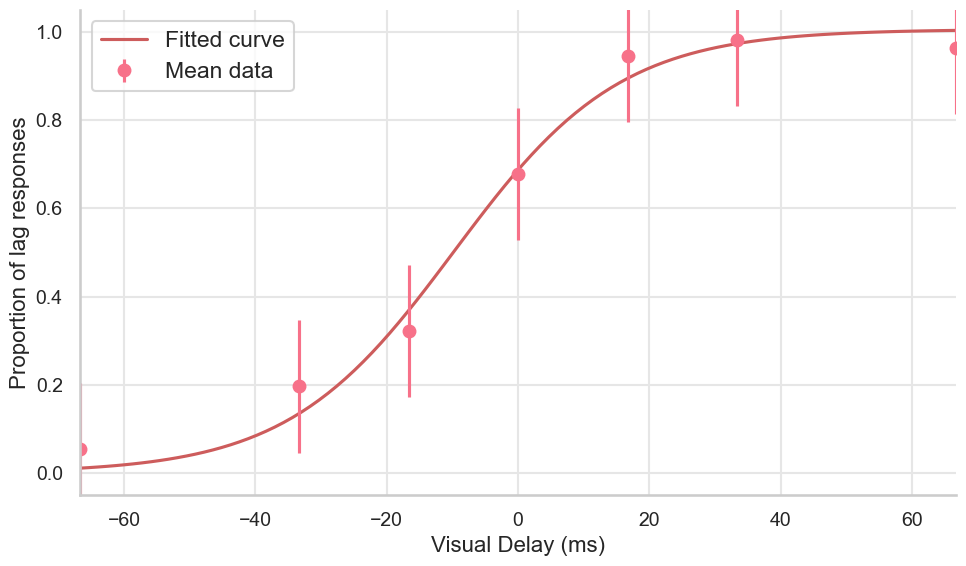

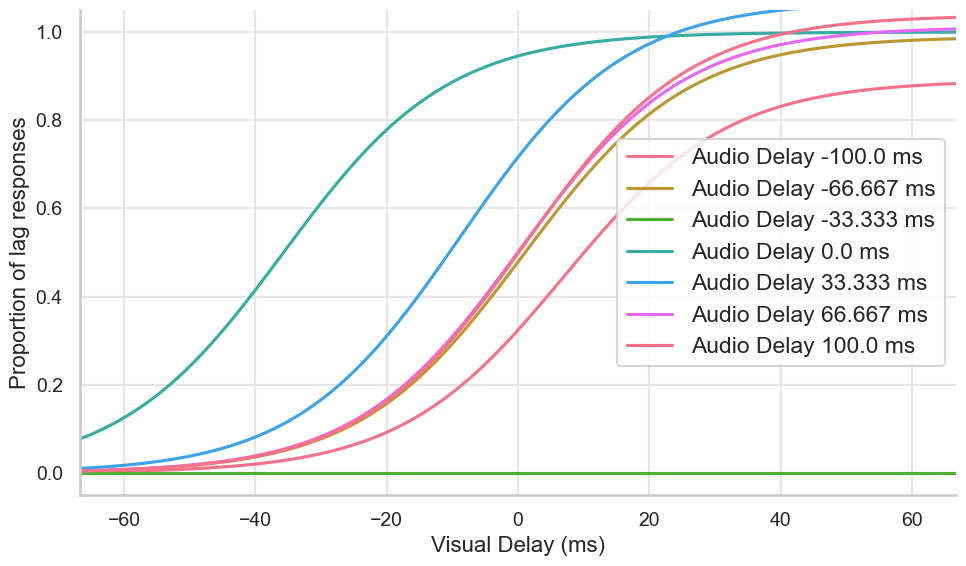

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# fit for overall data
def logistic_function(x_data, x_0, slope, bias,lapse_rate):
    func_y= lapse_rate / (1 + np.exp(-slope * ((x_data + bias) - x_0)))
    return func_y

# fit for overall data
def logistic_function_complete(x_data,slope_params,x_0, bias,lapse_rate):
    func_y= lapse_rate / (1 + np.exp(-(0.08 * (x_data + bias) - x_0)))
    return func_y


# Prepare the data for fitting
x_data = df['visualDelaysAimed_ms']
y_data = df['responses']

# Initial guess for the parameters
initial_guess = [np.median(x_data), 1,1,1]  # Added initial guess for bias

# Fit the logistic function to the data
params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)

slope_params = params[1]
print(f'Slope parameter: {slope_params}')


# Generate data for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = logistic_function(x_fit, *params)
plt.plot(x_fit, y_fit, color='indianred', label='Fitted curve')

# plot the means
mean_data = df.groupby('visualDelaysAimed_ms').mean().reset_index()
plt.errorbar(mean_data['visualDelaysAimed_ms'], mean_data['responses'], yerr=mean_data['responses'].sem(), fmt='o', label='Mean data')
plt.ylabel('Proportion of lag responses')
plt.xlabel('Visual Delay (ms)')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1
plt.legend()

# Plot the data and the fitted curve for unique audio delays
plt.figure(figsize=(10, 6))

unique_audioDelays = np.unique(df['audioDelaysAimed_ms'])
for audio_delay in unique_audioDelays:
    subset = df[df['audioDelaysAimed_ms'] == audio_delay]
    x_data = subset['visualDelaysAimed_ms']
    y_data = subset['responses']
    
    # Fit the logistic function to the subset data
    params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)
    

    # Generate data for plotting the fitted curve
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit =  logistic_function_complete(x_fit,params[0],slope_params,params[2],params[3])

    plt.plot(x_fit, y_fit, label=f'Audio Delay {audio_delay} ms')

plt.xlabel('Visual Delay (ms)')
plt.ylabel('Proportion of lag responses')
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()

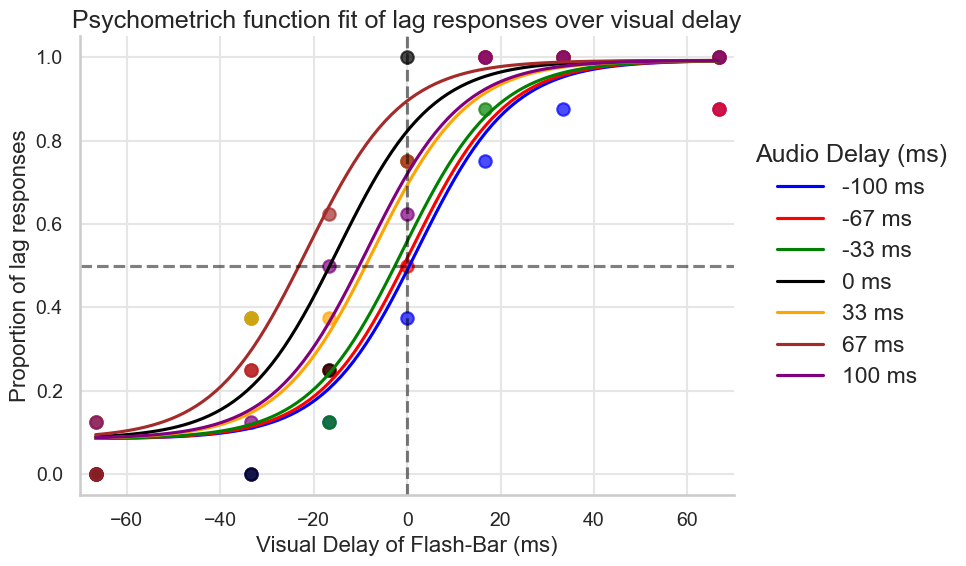

In [146]:

def logistic_function(x_data,slope, x_0, bias,lapse_rate,guess_rate):
    func_y= guess_rate+(1-guess_rate-lapse_rate)*(1 / (1 + np.exp(-slope * ((x_data + bias) - x_0))))
    return func_y



# Prepare the data for fitting
x_data = df['visualDelaysAimed_ms']
y_data = df['responses']

# Initial guess for the parameters
x_0_guess = np.mean(x_data)
bias_guess = 0
slope_guess = y_data.max() / (x_data.max() - x_data.min())
lapse_rate_guess = y_data.min()
initial_guess=[slope_guess,x_0_guess,bias_guess,lapse_rate_guess,0.01]
#initial_guess = [0.5, np.median(x_data), 0, 0.7]  # Added initial guess for bias

# Fit the logistic function to the data
params, covariance = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)

slope_overall = params[0]
lapse_overall=params[3]
guess_overall=params[4]
# Generate data for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = logistic_function(x_fit, *params)


unique_audioDelays = np.unique(df['audioDelaysAimed_ms'])

colors=['blue','red','green','black','orange','brown','purple','gray','cyan']

for j,delays in enumerate(unique_audioDelays):
    meanX = df[df['audioDelaysAimed_ms'] == delays].groupby('visualDelaysAimed_ms').mean().reset_index()
    meanResponses = meanX['responses']

    plt.scatter(meanX['visualDelaysAimed_ms'], meanResponses, color=colors[j],alpha=0.7)
    x_data=df[df['audioDelaysAimed_ms'] == delays]['visualDelaysAimed_ms']
    y_data=df[df['audioDelaysAimed_ms'] == delays]['responses']

    params,covariance= curve_fit(logistic_function,x_data,y_data,p0=initial_guess)

    x_fit = np.linspace(min(meanX['visualDelaysAimed_ms']), max(meanX['visualDelaysAimed_ms']), 100)
    y_fit = logistic_function(x_fit,slope_overall, params[1], params[2],lapse_overall,guess_overall)

    plt.plot(x_fit, y_fit, label=f'{round(delays)} ms', color=colors[j])
plt.ylabel('Proportion of lag responses')
plt.xlabel('Visual Delay of Flash-Bar (ms)')
plt.xlim(-70, 70)
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.title('Psychometrich function fit of lag responses over visual delay')


plt.legend(title='Audio Delay (ms)', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)


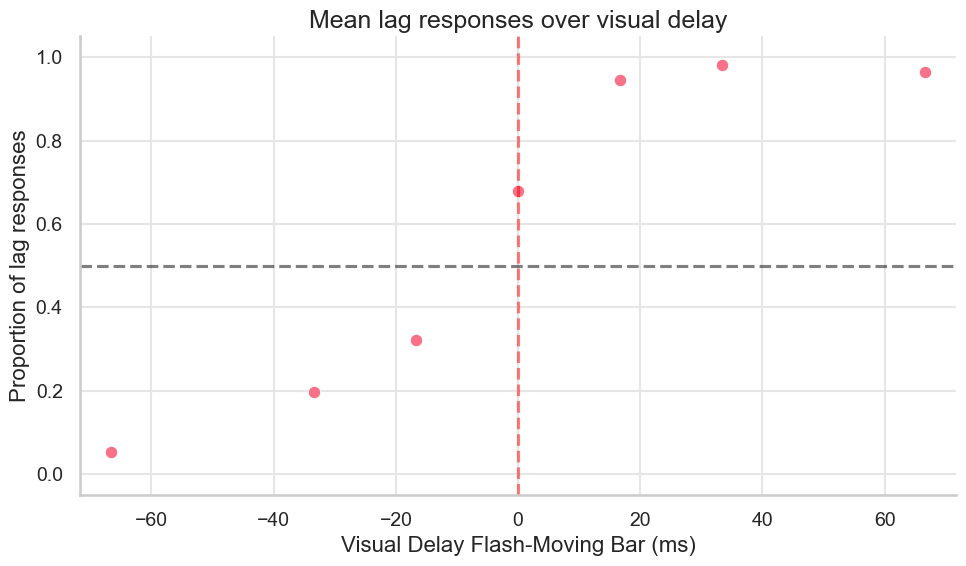

In [59]:
# Now plot only the mean responses for each visual delay aimed
# Group the data by visualDelayAimed and calculate the mean of responses
grouped_data = df.groupby('visualDelaysAimed_ms').mean().reset_index()
grouped_data

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelaysAimed_ms', y='responses', data=grouped_data)
plt.axhline(y=0.5, color='k', linestyle='--',alpha=0.5)
plt.axvline(x=0, color='r', linestyle='--',alpha=0.5)

plt.title('Mean lag responses over visual delay')
plt.xlabel('Visual Delay Flash-Moving Bar (ms)')
plt.ylabel('Proportion of lag responses')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1plt.title('Mean lag responses over visual delay')
plt.xlim(grouped_data['visualDelaysAimed_ms'].min() - 5, grouped_data['visualDelaysAimed_ms'].max() + 5)  # Extend the x-axis limit slightly beyond min and max values
plt.show()



(-105.0, 105.0)

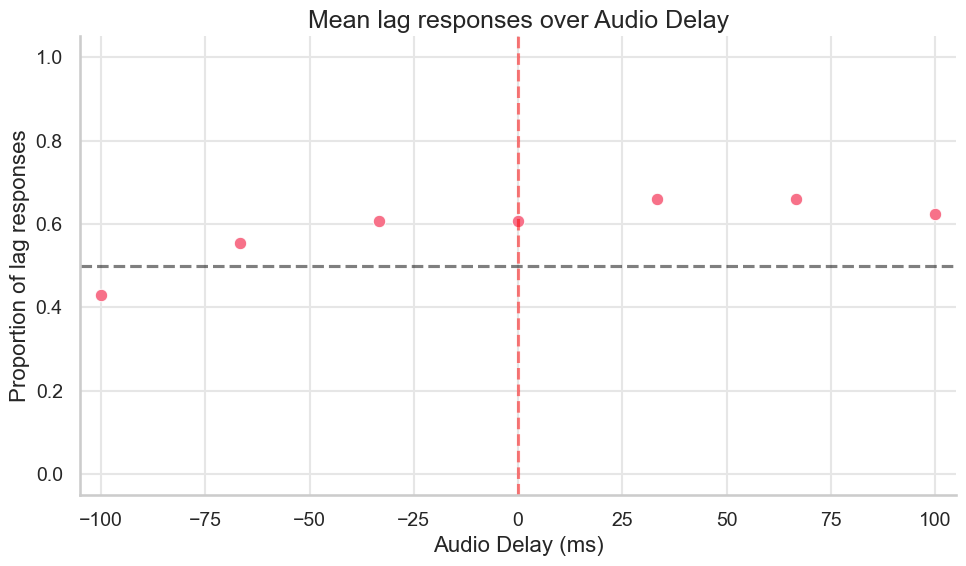

In [60]:
# Now plot the mean responses for only audio delay aimed
# Group the data by audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby('audioDelaysAimed_ms').mean().reset_index()
grouped_data
 
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='audioDelaysAimed_ms', y='responses', data=grouped_data)
# plot a line on 0.5 to show the threshold
plt.axhline(y=0.5, color='k', linestyle='--',alpha=0.5)
plt.axvline(x=0, color='r', linestyle='--',alpha=0.5)

plt.xlabel('Audio Delay (ms)')
plt.ylabel('Responses')
plt.title('Mean lag responses over Audio Delay')
plt.ylabel('Proportion of lag responses')
plt.ylim(-0.05, 1.05)  # Extend the y-axis limit slightly beyond 0 and 1plt.title('Mean lag responses over visual delay')
plt.xlim(grouped_data['audioDelaysAimed_ms'].min() - 5, grouped_data['audioDelaysAimed_ms'].max() + 5)  # Extend the x-axis limit slightly beyond min and max values
